# Regresión Lineal

En este notebook comenzamos a trabajar en los problemas de **Regresión**. Un problema de regresión consiste en aprender a predecir una *etiqueta* *Y* continua o cuantitativa a partir de un conjunto de atributos  **X**, tomando como muestra un conjunto de instancias. El modelo más común de regresión es la regresión lineal. Los modelos lineales se encuentran entre los modelos más simples, pero siguen siendo extremadamente comunes y útiles. Tienen algunas propiedades analíticas simples y son extremadamente fáciles de entrenar e interpretar. Además, son la base para un montón de modelos más complejos y modernos. Su importancia no debe ser subestimada.

## 1. Regresión Lineal - 1D

En la materia Introducción a la Ciencia de Datos ya han tenido un primer acercamiento a la regresión lineal. Aquí vamos a hacer un repaso de los principales conceptos que utilizaremos. Supongamos que queremos predecir una variable cuantitativa $Y$ como función de una única variable (por ahora, asumimos también cuantitativa) $X$. El modelo lineal asume que entre esas variables existe una relación del tipo

$$Y \approx \beta_0 + \beta_1 X,$$

donde $\beta_0$ y $\beta_1$ son los parámetros del modelo, en este caso conocidos como *ordenada al origen* y *pendiente*, respectivamente. Estos parámetros son, hasta que no utilicemos los datos, parámetros desconocidos del modelo, que debemos *ajustar*. Otra forma que a veces pueden encontrar para el modelo lineal es la siguiente:

$$Y = \beta_0 + \beta_1 X + \epsilon, $$

donde $\epsilon$ es un término de error del modelo. A primera vista, este término puede ser muy confuso, pero esperamos que pronto quede claro qué significa. Notar que, en cualquiera de las dos formas, la variable predictora $X$ aparece de forma *lineal*, es decir, no está elevada al cuadrado, o dentro de una raíz cuadrada, o dentro de un seno, u otras relaciones funcionales. Veremos en clases posteriores que este modelo es mucho más flexible de lo que parece. Tal vez les sorprenda leer ahora que podemos utilizar el modelo lineal para obtener relaciones no-lineales.

**Referencias útiles**:

* Capítulo 3 de *An Introduction to Statistical Learning*. Lo pueden obtener [aquí](https://www.statlearning.com/).
* [Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/limo.html)


**Repaso**

1. ¿Cuáles son las ventajas de utilizar un modelo lineal?¿Y las desventajas?
1. ¿Cuáles son las hipótesis del modelo lineal? Si no se cumplen, ¿significa que no podemos usar una regresión?

#### Dataset Sintético

Vamos a comenzar generando un dataset sintético. Esto quiere decir que vamos a conocer la verdadera relación entre nuestra variable objetivo $Y$ y nuestra variable predictora $X$. Esto NO es lo común, pero lo hacemos para que puedan ver el efecto de algunas características del proceso.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

La siguiente celda genera nuestro dataset sintético. Por ahora, serán 1000 puntos provenientes de una relación lineal 1-D de la forma $y = 3x - 2$. Asegúrate de identificar correctamente la pendiente ($\beta_1$) y la ordenada al origen ($\beta_0$).

In [4]:
n = 1000
X = np.linspace(-2,3,n)
y_real = 3*X - 2 # funcion

Sin embargo, esta relación no es muy realista, ya que en cualquier proceso de medición suele introducirse *ruido*. ¿Dónde se origina ese ruido? Bueno, podríamos escribir mucho al respecto, desde detalles técnicos hasta aspectos filosóficos. Por ahora vamos a decir que depende de cada proceso, a veces lo podemos reducir, a veces no. Vamos a experimentar introduciendo ruido gaussiano, de forma de acercanos a un proceso de medición realista.

In [5]:
np.random.seed(2022)
alpha = 1
y = y_real + alpha*np.random.randn(n)

Graficamos los puntos obtenidos junto con la curva teórica.

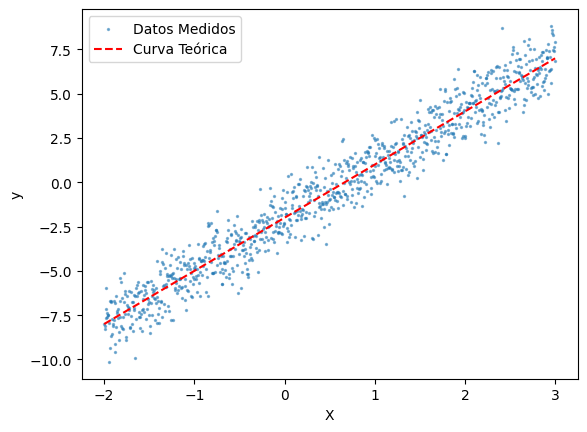

In [6]:
plt.scatter(X,y, s=2, alpha=0.5, label='Datos Medidos')
plt.plot(X, y_real, '--',label='Curva Teórica', c='r')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

Notar que, si bien los puntos no están sobre la línea teórica - debido al ruido -, la relación lineal parece mantenerse muy bien.

**Ejercicio:** jugar con el código introduciento diferentes niveles de ruido modificando la variable `alpha`. ¿Cuándo crees, a simple vista, que la relación lineal ya queda oculta por el ruido?

In [15]:
np.random.seed(2022)
alpha = 5
y = y_real + alpha*np.random.randn(n)

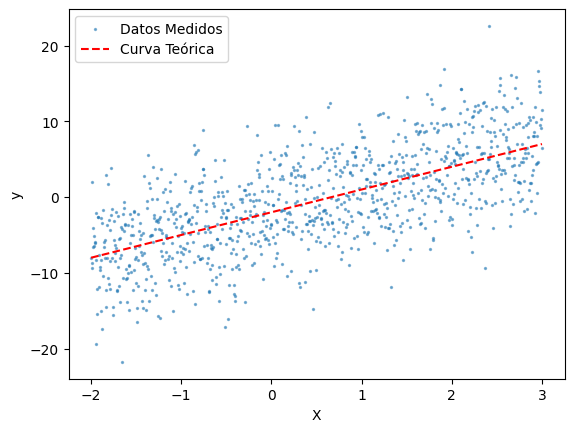

In [16]:
plt.scatter(X,y, s=2, alpha=0.5, label='Datos Medidos')
plt.plot(X, y_real, '--',label='Curva Teórica', c='r')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

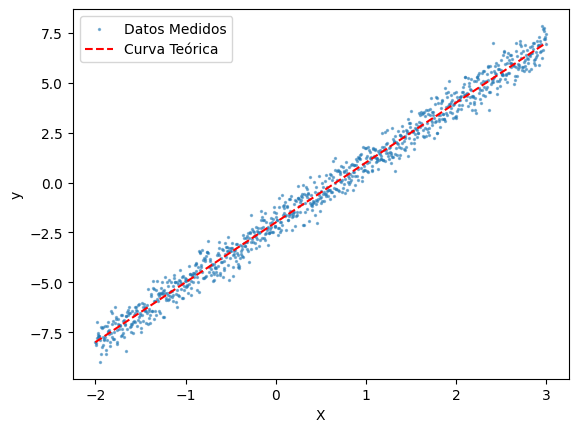

In [14]:
np.random.seed(2022)
alpha = 0.5
y = y_real + alpha*np.random.randn(n)
plt.scatter(X,y, s=2, alpha=0.5, label='Datos Medidos')
plt.plot(X, y_real, '--',label='Curva Teórica', c='r')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

Empecemos notando algo. Cualquier método para ajustar datos arranca con ciertos postulados sobre las características de esos datos. Para la regresión lineal son la linealidad, normalidad, homocedasticidad, independencia, ausencia de multicolinealidad, etc. Cuando estas condiciones se cumplen, el método es óptimo, y los resultados que se desprenden del método tienen total validez. Entonces, antes de ajustar una regresión lineal, deberíamos chequear si esas hipótesis se cumplen. Sin embargo, salvo en contadas ocasiones, es muy difícil tener absoluta certeza de que así sea. En general, no hay ningún motivo para suponer que esas condiciones se cumplan exactamente y, en muchos casos, ni siquiera aproximadamente. ¿Entonces significa que no podemos usar el método? Por suerte, no. Si no se cumplen, eso no significa que el método sea malo. Probablemente haya uno mejor - que en general no sabemos cuál es - y debemos tener particular cuidado con las conclusiones estadísticas que desprendamos del método. Además, exiten  métodos que se proponen con muy pocas hipótesis y que no tienen garantía de optimalidad teórica. Otros métodos son óptimos en condiciones muy generales, pero solo cuando el tamaño de muestra tiende a infinito (es decir, cuando es muy grande nuestro conjunto de datos). En el mundo real, no hay ningún método que sea mejor que todos los demás en todos los casos.

Pero hay algo más que también es importante diferenciar. Algunas veces, cuando estamos estudiando cierto fenómeno, nuestro objetivo principal no es modelar su naturaleza y entenderlo, sino simplemente tener poder predictivo sobre lo que va a ocurrir. Entonces, ¿qué podemos hacer en este mundo de hipótesis, métodos y objetivos aparentemente disímeles? Un enfoque complementario - típico de la comunidad de Aprendizaje Automática y expresado de manera simplificada - es probar un método y "si funciona, funciona". Pero, ¿cuándo un método funciona? Cuando tiene **poder predictivo**. Nuestro objetivo principal ya no va a ser modelar y comprender la realidad, sino simplemente tener buenas predicciones.

### 1.2 Regresión lineal con Scikit-Learn


Vamos a ajustar estos datos con la regresión lineal de Scikit-Learn. **Es recomendable consultar la [documentación sobre regresión lineal de esa librería](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).**

1. Definición de un objeto modelo `linear_model` (o como ustedes prefieran llamarlo, es indistinto).

In [17]:
import numpy as np
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

2. Ajuste a los datos (`.fit(X,y)`).

**Nota:** cuando trabajen con un solo atributo (X tiene un solo atributo), se van a topar con un error típico. Scikit-Learn espera que X tenga la forma de *número de instancias* x *número de atributos*, entonces, debemos llevar X a esa forma bidimencional utilizando el método `reshape`.

In [18]:
print(X.shape)
X = X.reshape(-1,1) # la x se lleva a forma bidimensional PARA AJUSTAR
print(X.shape)

(1000,)
(1000, 1)


Ya podemos ajustar

In [19]:
linear_model.fit(X,y)

LinearRegression()

Obtenga los pesos del modelo lineal.

*Pista:*
- *Considere los atributos `linear_model.coef_` y `linear_model.intercept_` del regresor lineal.

In [21]:
coef = linear_model.coef_  #coeficiente
intercept = linear_model.intercept_ #intercept

print(f'Coeficiente : {coef} \nIntercept: {intercept}')

Coeficiente : [3.06033496] 
Intercept: -1.958072963938137


Notar que la pendiente es parte de un `array`... Eso es una pista de algo que se viene después. Ahora, ¿Cómo podemos hacer para saber si el ajuste es bueno?

En primer lugar, veamos otra cosa que podemos hacer con el objeto `linear_model`. Podemos hacer predicciones.

3. Predicciones (`.predict(X)`).

In [23]:
y_pred=linear_model.predict(X) # predice
#print(y_pred)

Nuevamente, veamos el resultado gráficamente.

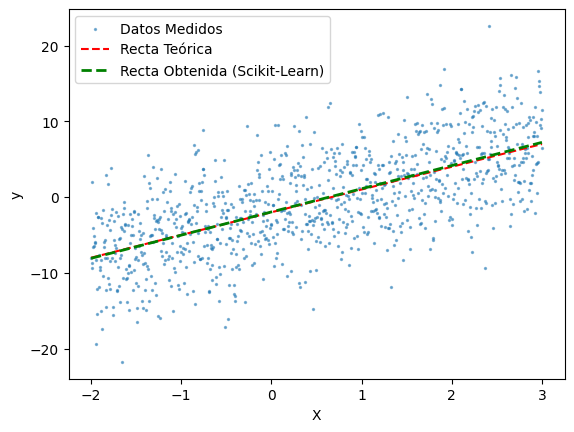

In [24]:
plt.scatter(X,y, s=2, alpha=0.5, label='Datos Medidos')
plt.plot(X, y_real, '--',label='Recta Teórica', c='r')
plt.plot(X, y_pred, '--', lw=2, label='Recta Obtenida (Scikit-Learn)', c='g') #c= color

plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

### 1.3 Evaluación

La evaluación de un modelo es algo tan importante como su entrenamiento. Lo primero que podemos hacer es comparar las predicciones obtenidas con los valores a predecir. Si el modelo está haciendo un buen trabajo, éstas deberían estar agrupadas alrededor de la identidad (la recta diagonal $y=x$).

#### Métricas

Otra forma de evaluar un modelo - sumamente importante y útil - es calcular una métrica de desempeño. En los problemas de regresión es común utilizar métricas como el **error cuadrático medio**:

$$ MSE(y, \hat y) = \frac{1}{M}\sum_{i=1}^M (y_i - \hat y_i)^2 $$

donde $M$ es la cantidad de instancias e $\hat y$ son las predicciones del modelo. Notar que estamos comparando cada dato y predicción de manera individual.

**Para Pensar:** si tuvieras que decir de qué parámetros del modelo depende el error cuadrático medio (MSE), ¿qué dirías?

Otra métrica muy utilizada, y un poco más amigable, es la **raiz del error cuadrático medio**, ya que tiene las mismas unidades que la variable obejtivo $y$

$$ RMSE(y, \hat y) = \sqrt{MSE(y, \hat y)} $$

Notar que la evaluación de un modelo siempre consiste en comparar los valores predichos $\hat y$ y los valores objetivo $y$, utilizando alguna métrica.

In [25]:
from sklearn.metrics import mean_squared_error # RMSE

def root_mean_squared_error(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

print(f'MSE = {mean_squared_error(y,y_pred)}')
print(f'RMSE = {root_mean_squared_error(y,y_pred)}')

MSE = 24.433204642626247
RMSE = 4.942995513110066


En este caso, por una cuestión de magnitudes, dan muy parecido. Modifica `alpha` (por ejemplo, 2, 5 y 10) y vuelve a correr. ¿Qué ocurre con el RMSE? También observa el gráfico y trata de ver si puedes interpretar el valor del RMSE gráficamente.

Existen muchas métricas para evaluar un modelo de regresión. Cuál será conveniente dependerá del objetivo de nuestro análisis. Pero notar que, en este caso, MSE es la misma métrica que utiliza Scikit-Learn para obtener los coeficientes del ajuste lineal. Es decir, estamos evaluando con la misma métrica que usamos para entrenar. Muchas veces esto **no será así.**

#### Residuos

Un último análisis que podemos hacer es el análisis de residuos. Esto consiste en ver la diferencia entre nuestra predicción y el valor real. El residuo se define como

$$ \text{res} = y - \hat y $$

Dos gráficos usuales que podemos hacer con los residuos son:

1. Su histograma

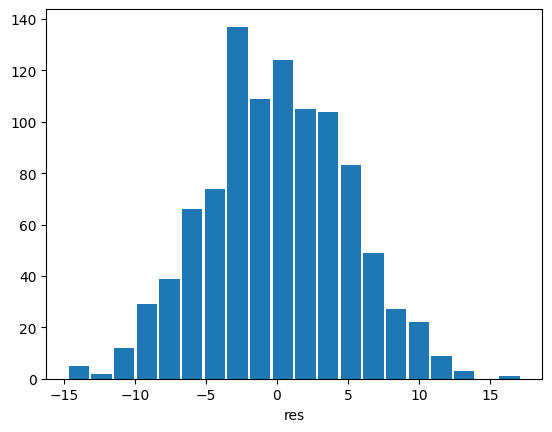

In [28]:
res = y - y_pred
plt.hist(res, bins = 20, rwidth = 0.9)

plt.xlabel('res')
plt.show()

En el enfoque clásico de regresión lineal, los residuos deben tener media cero y estar distribuidos normalmente. En la práctica, esto no suele suceder, ya que son necesarias muchas hipótesis para que así sea. Sin embargo, observar este gráfico puede darnos indicios de la calidad de nuestro modelo.

**Para pensar:** ¿Cuál te parece que es el *ancho* de esta distribución y con qué valor visto puede estar relacionado?

2. También podemos graficar la relación entre el residuos y el valor correspondiente de $X$

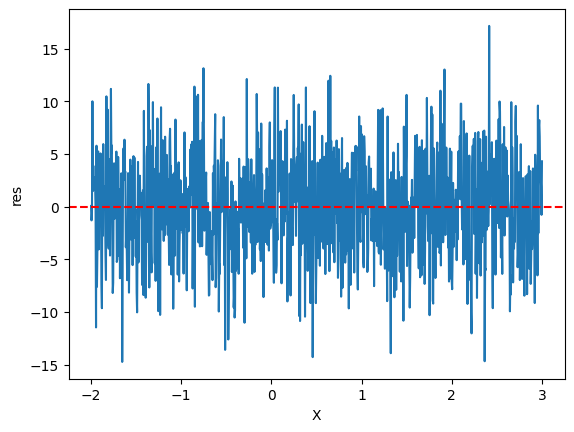

In [29]:
plt.plot(X, res)
plt.axhline(0, color='r', linestyle='--', label='Recta Teórica (y=0)') # RECTA HORIZONTAL
plt.xlabel('X')
plt.ylabel('res')
plt.show()

Este gráfico también suele ser muy útil, ya que nos da una idea sobre en qué regiones de X el modelo anda mejor y en cuáles peor. A medida que hay más atributos predictores, este gráfico es más difícil de interpretar.

Podemos calcular algunos estadísticos asociados a los residuos...

In [30]:
print('La varianza de los errores es: ', np.var(res))
print('La desviación estándard de los errores es:', np.std(res))

La varianza de los errores es:  24.433204642626247
La desviación estándard de los errores es: 4.942995513110066


Obviamente que recuperamos los valores obtenidos anteriormente con los cálculos del MSE y del RMSE. Se destaca que el valor del error estándard (RMSE) es aproximadamente igual al valor que definimos para `alpha`. Esto se logra ya que trabajamos con un conjunto de datos sintéticos.

Nota: se cuenta con recursos gráficos para conocer si los valores de una muestra provienen de una distribución normal como los gráficos QQ-plot. Asimismo, se pueden practicar tests como el de Smirnov-Kolmogorov para dar una respuesta estadística a esta pregunta.

In [31]:
from scipy import stats
stats.kstest(res, stats.norm.cdf, args=(0, alpha))

KstestResult(statistic=np.float64(0.2184283885852083), pvalue=np.float64(2.2602297806448206e-42), statistic_location=np.float64(2.6622783379223334), statistic_sign=np.int8(-1))

Cuando testeamos variables aleatorias obtenidas de una distribución normal, esperamos que los datos sean consistentes con la hipótesis nula la mayoría de las veces. (La hipótesis nula es que los datos se distribuyen de acuerdo a una distribución normal.) Ciertamente, en este caso, el p-value es mucho mayor a 0.05. Un nivel de confianza del 95% para rechazar la hipótesis nula en favor de una alternativa (no gaussiana) requeriría un p-value menor a 0.05 y, por tanto, no podemos rechazar la hipótesis nula. Es decir, podemos asumir que los residuos son realizaciones de una vadistribución normal.

## 2. Regresión Lineal - 3D - 3 VARIABLES

> Add blockquote



La generalización de la regresión lineal a más atributos es muy sencilla. Por ejemplo, para dos atributos, $X_1$ y $X_2$, la forma es

$$Y \approx \beta_0 + \beta_1 X_1 + \beta_2 X_2.$$

Y, en el caso de $p$ variables predictoras,

$$Y \approx \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + ... + \beta_p X_p.$$

Es decir, debemos encontrar una pendiente por cada atributo, pero sigue siendo una única ordenada al origen.

Ahora, replicaremos el mismo análisis, pero para una relación lineal con dos atributos, $y = -3x_1 + 2x_2 + 4$. Nuevamente, sumaremos algo de ruido para hacerlo más realista.

In [32]:
n = 1000 # MUESTRA
x1 = np.random.rand(n)
x2 = np.random.rand(n)
y = -3*x1 + 2*x2 + 4 + 0.25*np.random.randn(n) # PLANO

Visualizamos. El código es un poco más complejo, no te preocupes si no lo entiendes.

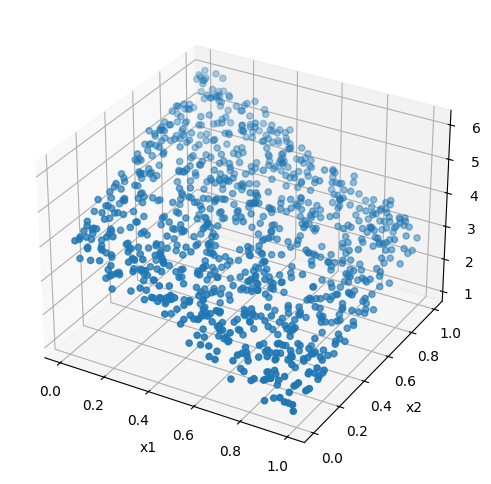

In [35]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_scatter(x1, x2, y, ax=None, fig = None):
    if (fig is None) and (ax is None):
        fig = plt.figure(figsize = (8,6))
        ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x1, x2, y)

    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')

plot_3d_scatter(x1, x2, y, ax=None, fig = None)

In [36]:
# Armamos la tabla de atributos encolumnando los datos de x1 y x2

X = np.vstack((x1,x2)).T #Uno a x1 y x2
print(X.shape) #(n , X1 , X2)

(1000, 2)


Notar que tiene el `shape` que necesita Scikit-Learn. Luego, hacemos un `train_test_split`.

In [37]:
import numpy as np
from sklearn.model_selection import train_test_split

# Dividir en conjuntos de entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

Definimos los modelos y entrenamos

In [38]:
from sklearn.linear_model import LinearRegression
linear_model2 = LinearRegression()

In [39]:
linear_model2.fit(X_train, y_train)

LinearRegression()

Nuevamente, veamos qué aprendió. Obtenga **las pendientes** y la ordenada al origen

In [40]:
print('La ordenada al origen βo es: {:.2f}'.format(linear_model2.intercept_))
[print('La pendientes de β{0} es: {1:.2f}'.format(i+1,xi)) for i, xi in enumerate(linear_model2.coef_)]

La ordenada al origen βo es: 4.03
La pendientes de β1 es: -3.04
La pendientes de β2 es: 2.00


[None, None]

En este caso, la curva que aproxima a los datos no es más una curva, sino una superficie. La siguiente función nos ayuda a graficar. Nuevamente, no se preocupen si no entienden del todo lo que hace.

In [41]:
from matplotlib import cm

def plot_3d_regressor(x1_min, x1_max, x2_min,x2_max, N, regressor, ax=None, fig = None):
    x1 = np.linspace(x1_min,x1_max,N)
    x2 = np.linspace(x2_min,x2_max,N)
    X1, X2 = np.meshgrid(x1,x2)

    y = regressor.predict(np.array([X1.ravel(), X2.ravel()]).T)
    Y = y.reshape(X1.shape)

    if (fig is None) and (ax is None):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

    surf = ax.plot_surface(X1, X2, Y, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha = 0.5)

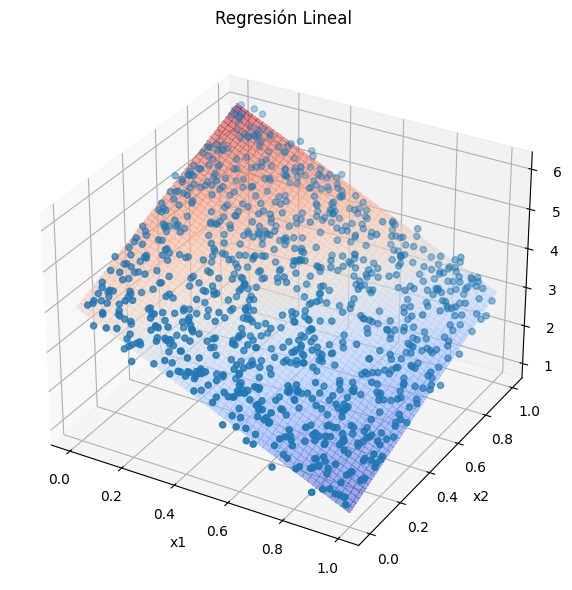

In [42]:
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111, projection='3d')
plt.title('Regresión Lineal')
plot_3d_regressor(0, 1, 0, 1, 100, linear_model2, ax, fig)
plot_3d_scatter(x1, x2, y, ax, fig)
plt.tight_layout()
plt.show()

Nuevamente, podemos hacer una evaluación de los resultados. Empecemos haciendo las predicciones.

In [44]:
y_pred=linear_model.predict(X_train) # predice

ValueError: X has 2 features, but LinearRegression is expecting 1 features as input.

Y repetimos la evaluación vista anteriormente.

In [ ]:
plt.scatter(y_train,y_pred, alpha=0.75, s=1)
plt.plot([0,7],[0,7], ls='--', c='r', label='identidad')
plt.xlabel('y')
plt.ylabel('y_pred')
plt.legend()
plt.show()

Calcule MSE y RMSE

In [ ]:
#Completar



Finalmente, miremos los residuos:

In [ ]:
res = y_train - y_pred
plt.hist(res, bins = 20, rwidth = 0.9)
plt.xlabel('res')
plt.show()

### Regresión 2-D desde el borrador

Los algoritmos de regresión lineal nos habilitan acercarnos al código fuente subyacente a una biblioteca como `scikit-learn`. Podemos tomar el artículo publicado bajo el título  [Regression Analysis from Scratch: Incorporating p-value Computation](https://medium.com/@jaleeladejumo/regression-analysis-from-scratch-incorporating-p-value-computation-c8a16823e04f) como ejemplo de la operación de la biblioteca. Se muestra una clase `LinearRegressionEx` que contiene métodos de nombres y resultados similares a los que aplicamos anteriormente: `fit` y `predict`. Lo interesante es que el método `p_values_calc` nos permite conocer la significancia estadístcia o *p-value* de los coeficientes regresores. Notar que para ajustar los coeficientes realiza el conocido cálculo matricial (por ejemplo, ver [Linear least squares](https://en.wikipedia.org/wiki/Linear_least_squares))

$\beta = \left( \mathbf{X}^T \mathbf{X} \right)^{-1} \mathbf{X}^T y$

y para predecir

$y = \mathbf{X} \beta$

donde la $\mathbf{X}$ agrega una primer columna de 1s para dar cuenta del término constante.

In [45]:
# Confirmar que el código fuente se encuentre en la misma ruta o carpeta que el notebook

from lin_reg_ex import LinearRegressionEx

model = LinearRegressionEx()
model.fit(X_train,y_train)

[print('El coeficiente  β{0} es: {1:.2f}'.format(i,xi)) for i, xi in enumerate(model.coefficients)]
[print('El p-value β{0} es: {1}'.format(i,xi)) for i, xi in enumerate(model.p_values_cal(X_train, y_train))]

print('Errores de entrenamiento con la implementación de ejemplo')
y_predict = model.predict(X_train)
print(f'MSE = {mean_squared_error(y_train,y_predict)}')
print(f'RMSE = {root_mean_squared_error(y_train,y_predict)}')



ModuleNotFoundError: No module named 'lin_reg_ex'

Este ejercicio, que consideramos interesante para sumergirnos en las rutinas que solemos emplear, produce resultados como el RMSE o  el MSE equivalentes a los obtenidos anteriormente.

## Dataset de Pingüinos

Vamos a cargar el conjunto de datos de pingüinos explorado en guías anteriores. Contiene 3 campos con atributos categóricos y 4 campos con atributos de punto flotante (¿Cómo podemos confirmarlo?). Además, hay algunos datos faltantes. En total, son 10 filas que eliminaremos para no trabar el análisis siguiente. Nos quedamos con los registros completos aplicando el operador lógico NOT que se representa por `~`,


In [47]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [48]:
data = pd.read_csv('/content/drive/MyDrive/Lic_en_Datos/IAA/datos/penguins_size.csv')  #drive mica
data.sample(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
264,Gentoo,Biscoe,50.5,15.9,222.0,5550.0,MALE
329,Gentoo,Biscoe,48.1,15.1,209.0,5500.0,MALE
70,Adelie,Torgersen,33.5,19.0,190.0,3600.0,FEMALE
263,Gentoo,Biscoe,49.6,15.0,216.0,4750.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE


In [52]:
pgs = data[~data.isnull().any(axis=1)]

In [ ]:
pgs = pd.read_csv('Datasets/penguins_size.csv')
pgs = pgs[~pgs.isnull().any(axis=1)]

Representamos todas los pares de interacciones posibles entre atributos numéricos con la biblioteca `seborn` distinguiendo las especies.

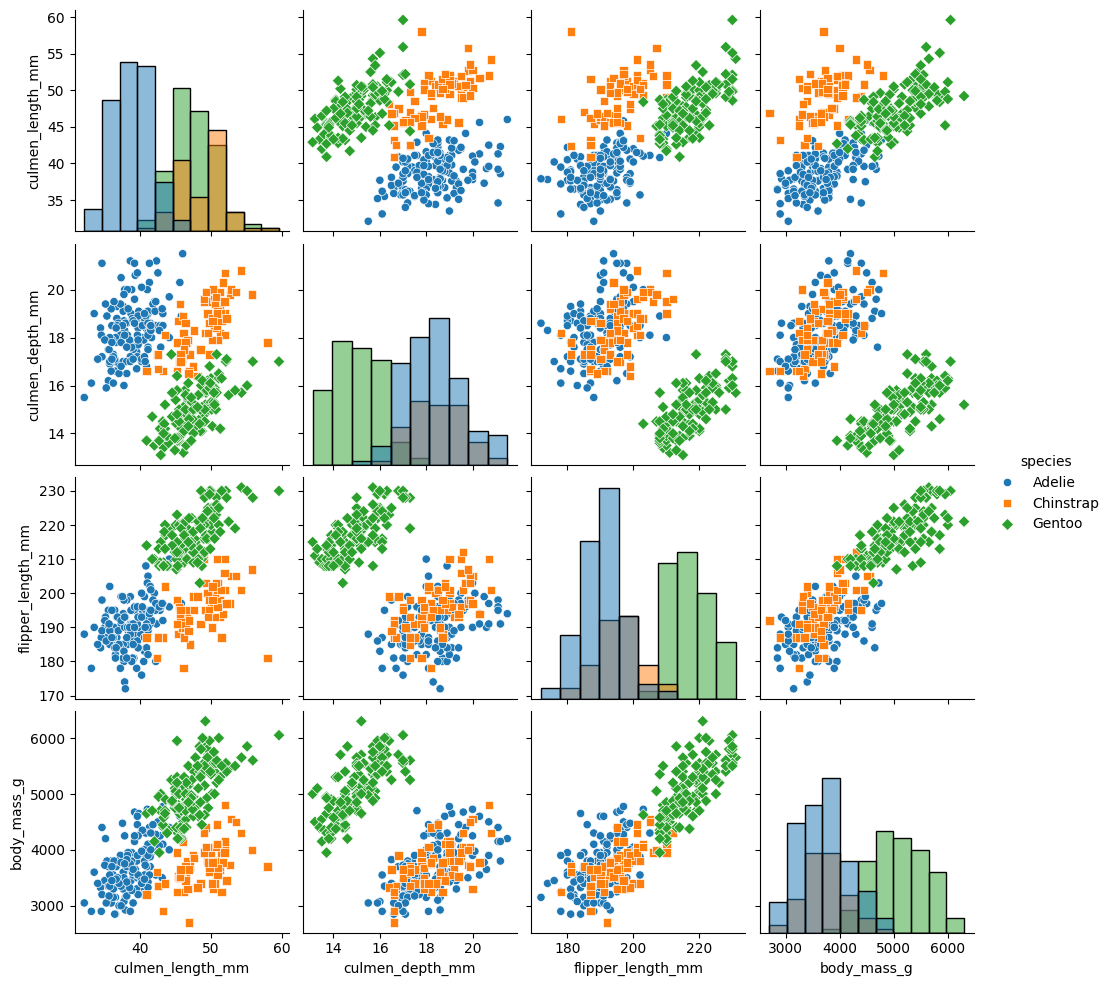

In [53]:
import seaborn as sns

sns.pairplot(pgs, hue="species", diag_kind="hist", markers=["o", "s", "D"])

Por ahora, solo nos quedamos con los atributos numéricos. La propuesta es estimar el peso de cada individuo a partir del uso exclusivo de las lecturas de sus diferentes dimensiones. Para esto, construiremos un modelo lineal que toma los atributos `culmen_length_mm`, `culmen_depth_mm`, y `flipper_length_mm` para ajustar y predecir `body_mass_g`.

In [56]:
pgs_num = pgs.select_dtypes(include='float64')

Generalizamos las herramientas aprendidas en el caso de regresión 2D. Asimismo, separamos en conjuntos de entrenamiento y prueba.

In [57]:
# Completar
# Definir las variables atributos X y las variables etiquetas y.
X = pgs_num.drop(columns='body_mass_g')
y = pgs_num['body_mass_g']

# Además, separar en datos de entrenamiento y prueba
# train_test_split es un wraper sobre la función más general ShuffleSplit
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True)
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1, test_size=0.25, random_state=42)
for i, (train_index, test_index) in enumerate(ss.split(X)):
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]

Construímos un modelo lineal, lo ajustamos a los datos de entrenamiento y predecimos el peso de cada individuo para luego comparar con los valores medidos

In [58]:
# Completar
# Crear y ajustar un modelo lineal, y predecir los pesos de los pingüinos
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)
y_pred = linear_model.predict(X_train)

Vamos a ver los coeficientes de la regresión ya ajustados

In [59]:
for i, coef in enumerate(linear_model.coef_):
    print('La pendiente para el atributo {} ({}): {:.2f}'.format(i+1, X_train.columns[i], coef))
print('La ordenada de origen : {:.2f}'.format(linear_model.intercept_))


La pendiente para el atributo 1 (culmen_length_mm): 1.89
La pendiente para el atributo 2 (culmen_depth_mm): 16.15
La pendiente para el atributo 3 (flipper_length_mm): 51.73
La ordenada de origen : -6554.51


El score (coeficiente de determinación o $R²$) que nos da el ajuste con los datos de entrenamiento es

In [60]:
print('Score en entrenamiento: ', linear_model.score(X_train, y_train))

Score en entrenamiento:  0.7598920902189804


Asimismo, podemos obtener el RMSE que nos habla del tamaño promedio de los errores del ajuste con los datos de entrenamiento

In [61]:
from sklearn.metrics import root_mean_squared_error
print('RMSE entrenamiento:',root_mean_squared_error(y_train,y_pred))


RMSE entrenamiento: 396.15606738364886


Vamos a representar el ajuste para el peso de los pingüinos. Además, recuperamos la especie del conjunto de datos original. La idea es ver si el grado de ajuste es similar para todas las especies...

In [62]:
# Armo un diccionario que asigna a cada especie un número entero
# Luego, cada número corresponderá a un color
sp_dict = {}
for i, sp in enumerate(pgs['species'].unique()):
    sp_dict[sp] = i


# Armo un vector que contiene los números que representan la especie
# Primero extraigo solo las especies del conjunto de entrenamiento
sp_train = pgs['species'].iloc[train_index]
sp_num = [sp_dict[sp] for sp in sp_train]
# o
sp_num = list(map(lambda sp: sp_dict[sp], sp_train))

sp_dict

{'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}

Text(0.5, 1.0, 'Relación de los pesos de los individuos predecidos y observados')

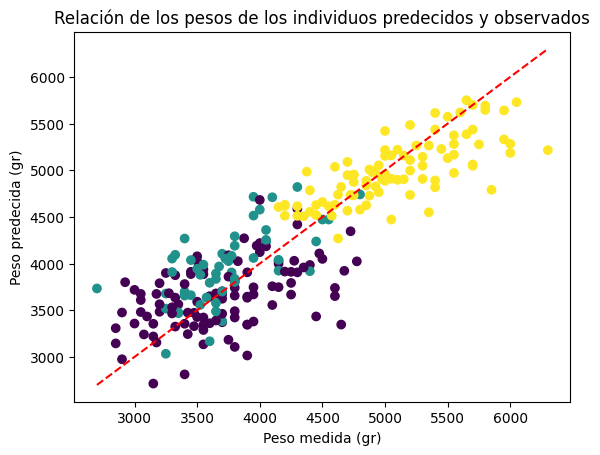

In [63]:
plt.scatter(y_train, y_pred, c=sp_num)
plt.plot([y_train.min(),y_train.max()], [y_train.min(),y_train.max()], c='red', label='Identidad', ls='--')
plt.xlabel('Peso medida (gr)')
plt.ylabel('Peso predecida (gr)')
plt.title('Relación de los pesos de los individuos predecidos y observados')

**Ejercicio**

Repetir los cálculos de score, RMSE y gráfico de dispersión con los datos de prueba. Recordar que NO se realiza un nuevo `.fit`. Se toman los pesos o parámetros calculados en entrenamiento.

### Variables DUMMIES

La figura de dispersión muestra que algunas especies se ubican por encima de la recta identidad y otras, mayoritariamente, por debajo. (Si hacemos un histograma de los errores por especie veríamos un fenómeno similar). Esto nos habla que podría existir una dependencia con la especie. Por tanto, ahora intentaremos tener en cuenta en la regresión las diferentes especies. Para esto agregamos variables **DUMMIES**. La idea es que de acuerdo a la especie se active un **parámetro** diferente en la regresión lineal. Es decir, vamos a transformar la columna de especies en 3 nuevas columnas donde cada individuo llevará un **1** solamente en aquel campo cuyo nombre de escpecie le corresponde.


In [64]:
# Ampliamos el número de columnas de atributos

X_train.loc[:,'Adelie'] = (sp_train == 'Adelie')
X_train.loc[:,'Chinstrap'] = (sp_train == 'Chinstrap')
X_train.loc[:,'Gentoo'] = (sp_train == 'Gentoo')


<ipython-input-64-8cb26b38b92e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[:,'Adelie'] = (sp_train == 'Adelie')
<ipython-input-64-8cb26b38b92e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[:,'Chinstrap'] = (sp_train == 'Chinstrap')
<ipython-input-64-8cb26b38b92e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

Ahora si planteamos esta regresión ampliada a las variables DUMMIES

In [66]:
# Completar
# Ajustar un modelo lineal y predecir los pesos
linear_model = LinearRegression(fit_intercept = False)
linear_model.fit(X_train,y_train)
y_pred = linear_model.predict(X_train)

**Atención**: ¿Por qué elegimos `fit_intercept=False`?. Vamos a ver los coeficientes de la regresión ya ajustados

In [67]:
#Completar
for i, coef in enumerate(linear_model.coef_):
    print('La pendiente para el atributo {} ({}): {:.2f}'.format(i+1, X_train.columns[i], coef))
print('La ordenada de origen : {:.2f}'.format(linear_model.intercept_))


La pendiente para el atributo 1 (culmen_length_mm): 36.64
La pendiente para el atributo 2 (culmen_depth_mm): 149.34
La pendiente para el atributo 3 (flipper_length_mm): 21.19
La pendiente para el atributo 4 (Adelie): -4498.49
La pendiente para el atributo 5 (Chinstrap): -4954.80
La pendiente para el atributo 6 (Gentoo): -3492.22
La ordenada de origen : 0.00


El score (coeficiente de determinación o $R²$ que nos da el ajuste es

In [68]:
# Completar el cálculo del score de entrenamiento e imprimir en pantalla
print('SCORE:',linear_model.score(X_train,y_train))


SCORE: 0.8423372467210366


Asimismo, podemos obtener el RMSE que nos habla del tamaño promedio de los errores del ajuste con los datos de entrenamiento

In [69]:
from sklearn.metrics import root_mean_squared_error
print('RMSE entrenamiento:',root_mean_squared_error(y_train,y_pred))

RMSE entrenamiento: 321.0167040825292


Vamos a representar el ajuste para el peso de los pingüinos.

Text(0.5, 1.0, 'Relación de pesos predecidos y observados')

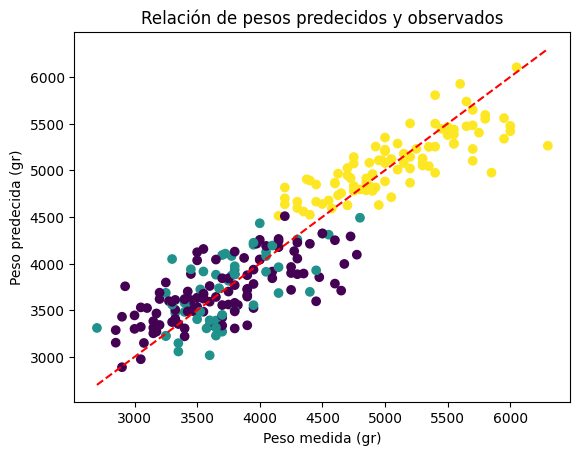

In [70]:

plt.scatter(y_train, y_pred, c=sp_num)
plt.plot([y_train.min(),y_train.max()], [y_train.min(),y_train.max()], c='red', label='Identidad', ls='--')
plt.xlabel('Peso medida (gr)')
plt.ylabel('Peso predecida (gr)')
plt.title('Relación de pesos predecidos y observados')

¿Cómo es ahora la dispersión de datos alrededor de la recta identidad? ¿Mejoró el score o el RMSE? ¿Cómo se interpretan los parámetros que multiplican a cada una de las variables DUMMIES? Si bien el RMSE suele mejorar con el agregado de más variables regresoras, ¿consideras que este cambio solamente se debe a haber incrementado el número de grados de libertad en el ajuste?

**Ejercicio**

1. Repetir los cálculos de score, RMSE y gráfico de dispersión con los datos de prueba. Recordar que NO se debe realizar un nuevo `.fit`. Se toman los pesos o parámetros calculados en entrenamiento.
   

## Adicionales

En la representación de las relaciones de a pares entre las diferentes variables numéricas podemos notar que `culmen_depth_mm` y `culmen_length_mm` sostienen una relación lineal diferente para cada especie. Proponemos realizar una regresión lineal que tome `culmen_length_mm` y 3 variables DUMMIES para las especies (como lo realizado más arriba) para ajustar a la variable etiqueta `culmen_depth_mm`. ¿Cómo resultan los valores de los parámetros? ¿Cómo comparan estos con el caso de realizar 3 ajustes lineales independientes, es decir, separando el conjunto de datos original en 3 subconjuntos independientes y únicos por especie?




## Preguntas

* ¿Es posible aplicar un modelo de regresión lineal si los errores no siguen una distribución gaussiana? ¿Cómo puedo identificar si los errores respetan dicha distribución?
* ¿Qué recupero si calculo la varianza de los errores? ¿Y si tomo su raíz cuarada? ¿Es solamente válido para datos sintéticos? ¿Qué pasa si no estoy aprovechando o no puedo conocer todos los atributos de los que depende el modelo? ¿Es la varianza una cota superior del error cuadrático?
* ¿Cómo podría incluir en la regresión el atributo `island` sabiendo que son 3 las categorías disponibles?
